In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import  ImageDataGenerator as Imgen

In [2]:
#Set Datapath

path = "E:/Dataset Zip/data1/"
train_data_path = path+"Training"
test_data_path = path+"Testing"
valid_data_path = path+"Testing"

In [3]:
# Set image size and batch size

#Augmenting the training dataset
traingen = Imgen(
                 rescale=1./255,
                 shear_range= 0.2,
                 zoom_range = 0.3,
                 width_shift_range = 0.2,
                 height_shift_range  =0.2,
                 fill_mode = "nearest",
                 validation_split=0.15)
#Augmenting the testing dataset
testgen = Imgen(# rescale the images to 1./255 
                rescale = 1./255
                )

In [4]:
trainds = traingen.flow_from_directory(train_data_path,
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory(train_data_path,
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     subset="validation"
                                      )
testds = testgen.flow_from_directory(train_data_path,
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)

Found 2441 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
Found 2870 images belonging to 4 classes.


In [5]:
#Images Classes with index

print(trainds.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


In [6]:
x,y = next(trainds)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot    
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()                                  #shows the figure or plot

In [7]:
c = trainds.class_indices
classes = list(c.keys())
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

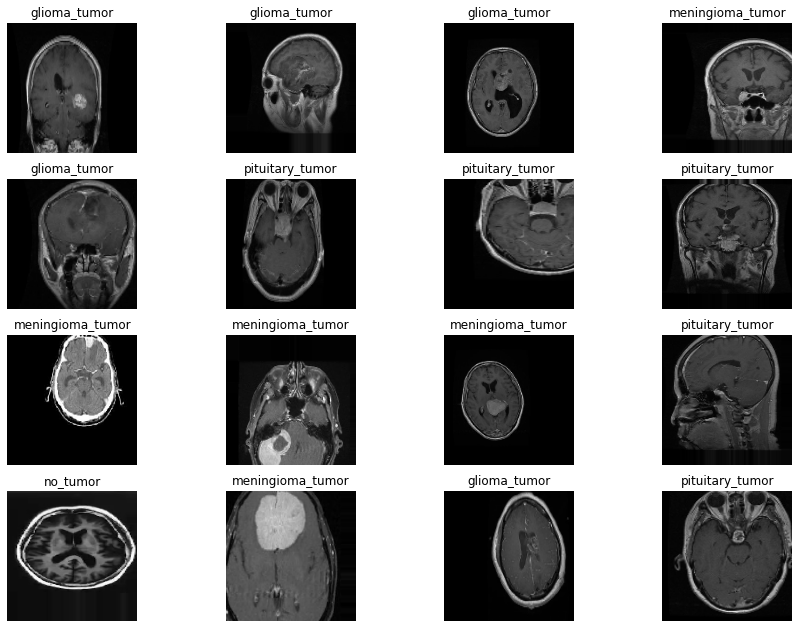

In [8]:
#Call the plotImages function
plotImages(x,y)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation
from keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [10]:
cnn = Sequential([
    # first Layer
    Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    MaxPooling2D((2, 2)),
    # second layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    # third layer
    Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 130, 130, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 65, 65, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 65, 65, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0

In [12]:
cnn.compile(loss="categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [13]:
#Train the model
import datetime
import time
start = datetime.datetime.now()
history = cnn.fit_generator(trainds, validation_data=valds, epochs=100)
end = datetime.datetime.now()
elapsed = end-start
print('Time: ', elapsed)

C:\Users\SOUMYA\anaconda3\envs\dl2.6\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
153/153 [==============================] - 36s 75ms/step - loss: 1.2991 - accuracy: 0.3408 - val_loss: 1.1727 - val_accuracy: 0.4732
Epoch 2/100
153/153 [==============================] - 13s 83ms/step - loss: 1.1292 - accuracy: 0.4855 - val_loss: 1.1434 - val_accuracy: 0.4476
Epoch 3/100
153/153 [==============================] - 11s 69ms/step - loss: 1.0348 - accuracy: 0.5551 - val_loss: 1.0456 - val_accuracy: 0.5361
Epoch 4/100
153/153 [==============================] - 14s 92ms/step - loss: 0.9534 - accuracy: 0.5854 - val_loss: 1.1133 - val_accuracy: 0.4918
Epoch 5/100
153/153 [==============================] - 11s 70ms/step - loss: 0.8743 - accuracy: 0.6219 - val_loss: 1.0678 - val_accuracy: 0.5035
Epoch 6/100
153/153 [==============================] - 13s 84ms/step - loss: 0.8109 - accuracy: 0.6682 - val_loss: 1.1042 - val_accuracy: 0.4615
Epoch 7/100
153/153 [==============================] - 11s 70ms/step - loss: 0.7929 - accuracy: 0.6571 - val_loss: 1.0160 - val_ac

In [14]:
#Get the accuracy score
cnn.evaluate(testds)

180/180 [==============================] - 4s 20ms/step - loss: 0.2691 - accuracy: 0.9321


[0.26914480328559875, 0.9320557713508606]

Text(0.5, 1.0, 'Loss Curves')

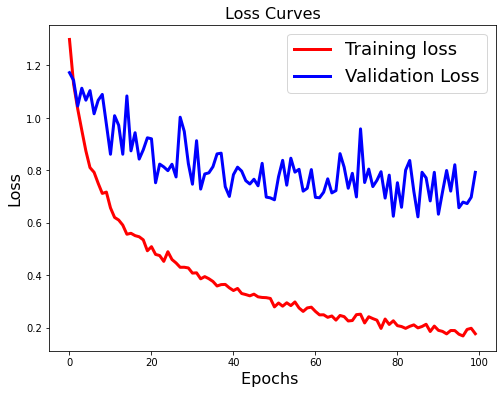

In [15]:
#Plot the Graph
# Loss Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

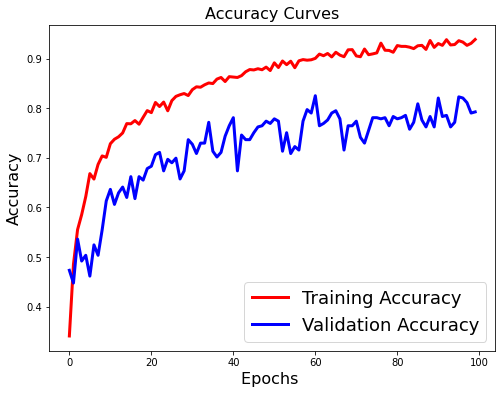

In [16]:
# Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

<Figure size 432x288 with 0 Axes>

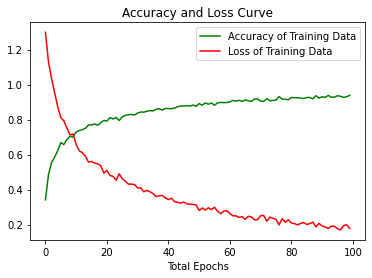

<Figure size 432x288 with 0 Axes>

In [17]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['loss'], 'red', label='Loss of Training Data')
plt.xlabel('Total Epochs')
#plt.ylabel('Accuracy achieved')
plt.title('Accuracy and Loss Curve')
plt.legend(loc=0)
plt.figure()

In [18]:
#Plot the confusion matrix. Set Normalize = True/False


def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """
	
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
	
#Print the Target names


target_names = []

for key in trainds.class_indices:

    target_names.append(key)


# print(target_names)

C:\Users\SOUMYA\anaconda3\envs\dl2.6\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


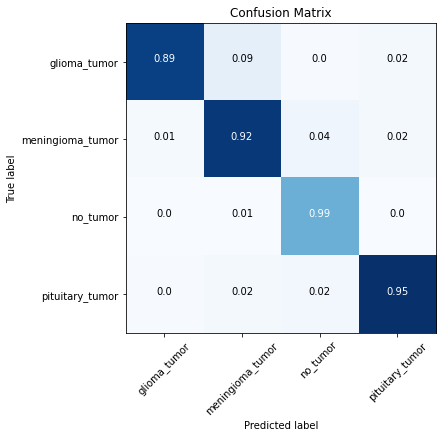

In [19]:
#Confution Matrix 
from sklearn.metrics import classification_report, confusion_matrix
import itertools

Y_pred = cnn.predict_generator(testds)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testds.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [20]:
#Print Classification Report

print('Classification Report')
print(classification_report(testds.classes, y_pred, target_names=target_names))

Classification Report
                  precision    recall  f1-score   support

    glioma_tumor       0.98      0.89      0.93       826
meningioma_tumor       0.89      0.92      0.91       822
        no_tumor       0.87      0.99      0.93       395
 pituitary_tumor       0.96      0.95      0.96       827

        accuracy                           0.93      2870
       macro avg       0.93      0.94      0.93      2870
    weighted avg       0.93      0.93      0.93      2870

